# 논리 회귀와 의사결정나무

## 목차

- 논리 회귀 실습
- 분류 평가 지표
- 의사결정나무 실습

# 논리 회귀

선형 회귀 방식을 이용한 이진 분류 알고리즘입니다.

## 선형 회귀로 풀기 힘든 문제의 등장

시험 전 날 공부한 시간을 가지고 해당 과목의 이수 여부(Pass or fail)를 예측하는 문제

- Fail(미이수): 0
- Pass(이수): 1

선형 회귀로 풀었을 때,

<img src="https://i.imgur.com/rDH5GyN.png" width="600px">

논리 회귀로 풀었을 때,

<img src="https://i.imgur.com/1dcZXYk.png" width="600px">

## Sigmoid 함수

<img src="https://i.imgur.com/4NItBv6.png" width="500px">

x(입력)가 음수 방향으로 갈 수록 y(출력)가 0에 가까워지고,

x(입력)가 양수 방향으로 갈 수록 y(출력)가 1에 가까워진다!

즉, 시그모이드 함수를 통과하면 0 에서 1 사이 값이 나온다!

> 실제 많은 자연, 사회현상에서는 특정 변수에 대한 확률값이 선형이 아닌 S 커브 형태를 따르는 경우가 많다고 합니다. 이러한 S-커브를 함수로 표현해낸 것이 바로 로지스틱 함수(Logistic function)입니다. 딥러닝에서는 시그모이드 함수(Sigmoid function)라고 불립니다.

# 논리 회귀 실습

## 유방암 데이터셋을 이용한 실습

### 데이터셋 로드

- 반지름 radius (mean of distances from center to points on the perimeter)
- 질감 texture (standard deviation of gray-scale values)
- 둘레 perimeter
- 면적 area
- 평탄성 smoothness (local variation in radius lengths)
- 밀도 compactness (perimeter^2 / area - 1.0)
- 오목함 concavity (severity of concave portions of the contour)
- 오목한 점의 개수 concave points (number of concave portions of the contour)
- 대칭 symmetry
- fractal dimension (“coastline approximation” - 1)
- Target: WDBC-Malignant(악성), WDBC-Benign(양성)

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 데이터 시각화

In [2]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


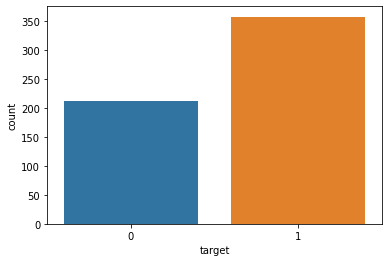

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['target'])
plt.show()

### 데이터 전처리

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df.drop(columns=['target']))

scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

### 데이터셋 분할

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled, df['target'], random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(426, 30) (426,)
(143, 30) (143,)


### 모델 정의, 학습

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

### 검증

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred)

0.9790209790209791

# 분류 평가 지표

내가 만든 분류기가 얼마나 잘 동작하는지 알아봅시다.

## Confusion Matrix

<img src="https://i.imgur.com/HkWURzS.jpg" width="600px">

https://skappal7.wordpress.com/2018/08/15/understanding-confusion-matrix/

**거꾸로 읽읍시다!**

모델이 Positive/Negative 예측했고, 실제로 True/False 인 경우

1. True Positive (TP): 모델이 임신했다고 예측했고, 실제로 임신한 경우 (참)
2. True Negative (TN): 모델이 임신하지 않았다고 예측했고, 실제로 임신하지 않은 경우 (참)
3. False Positive (FP): 모델이 임신했다고 *예측했지만*, 실제로 임신하지 않은 경우 (거짓)
4. False Negative (FN): 모델이 임신하지 않았다고 *예측했지만*, 실제로 임신한 경우 (거짓)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

cm

array([[60,  1],
       [ 2, 80]])

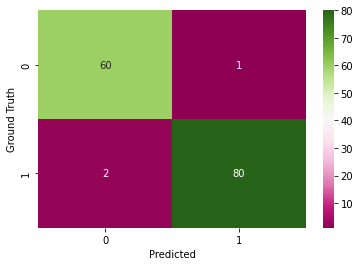

In [ ]:
sns.heatmap(cm, annot=True, cmap='PiYG')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

In [10]:
TN, FP, FN, TP = cm.flatten()

print(TP, TN, FP, FN)

80 60 1 2


## 정확도 Accuracy

얼마나 정답을 잘 예측했는가

Accruacy = (TP + TN) / Total

In [11]:
(TP + TN) / (TP + TN + FP + FN)

0.9790209790209791

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.9790209790209791

## 오류율 Error Rate

얼마나 틀렸는가

ER = (FP + FN) / Total

In [13]:
(FP + FN) / (TP + TN + FP + FN)

0.02097902097902098

## 정밀도 Precision

모델이 임신했다고 예측한 것 중에서, 진짜 임신한 경우는 얼마나 되는가

모델이 암이라고 예측한 것 중에서, 진짜 암인 경우는 얼마나 되는가

모델이 스팸 메일이라고 분류한 것 중에서, 진짜 스팸 메일인 경우는 얼마나 되는가
- 중요: 스팸 메일로 분류했는데 중요 메일인 경우

Precision = TP / Predicted yes

In [14]:
TP / (TP + FP)

0.9876543209876543

In [15]:
from sklearn.metrics import precision_score

precision_score(y_val, y_pred)

0.9876543209876543

## 재현율 Recall

실제 임신했는데, 모델이 임신이라고 예측한 경우는 얼마나 되는가

실제 암인데, 모델이 암이라고 예측한 경우는 얼마나 되는가

* 중요: 암에 걸렸는데 암이 아니라고 예측해버렸을 경우

실제 비가 오는데, 모델이 비가 온다고 예측한 경우는 얼마나 되는가

* 중요: 비가 오는데 비가 안온다고 예측해버렸을 경우 <img src="https://i.imgur.com/Zq10Chy.png" width="25px">

Recall = TP / Actual yes

In [16]:
TP / (FN + TP)

0.975609756097561

In [17]:
from sklearn.metrics import recall_score

recall_score(y_val, y_pred)

0.975609756097561

## F1 Score

정밀도와 재현율의 균형도(가중 평균)

F1 = 2 * (precision * recall) / (precision + recall)

In [18]:
from sklearn.metrics import f1_score

f1_score(y_val, y_pred)

0.9815950920245398

# 의사 결정 나무

Decision Tree 스무 고개

<img src="https://i.imgur.com/XHGtbzq.png" width="500px">

## 유방암 데이터셋을 이용한 실습

### 모델 정의, 학습

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

### 검증

In [20]:
y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred)

0.9300699300699301

### 의사결정나무 시각화

In [21]:
!pip install -q dtreeviz

     |████████████████████████████████| 62 kB 786 kB/s 


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


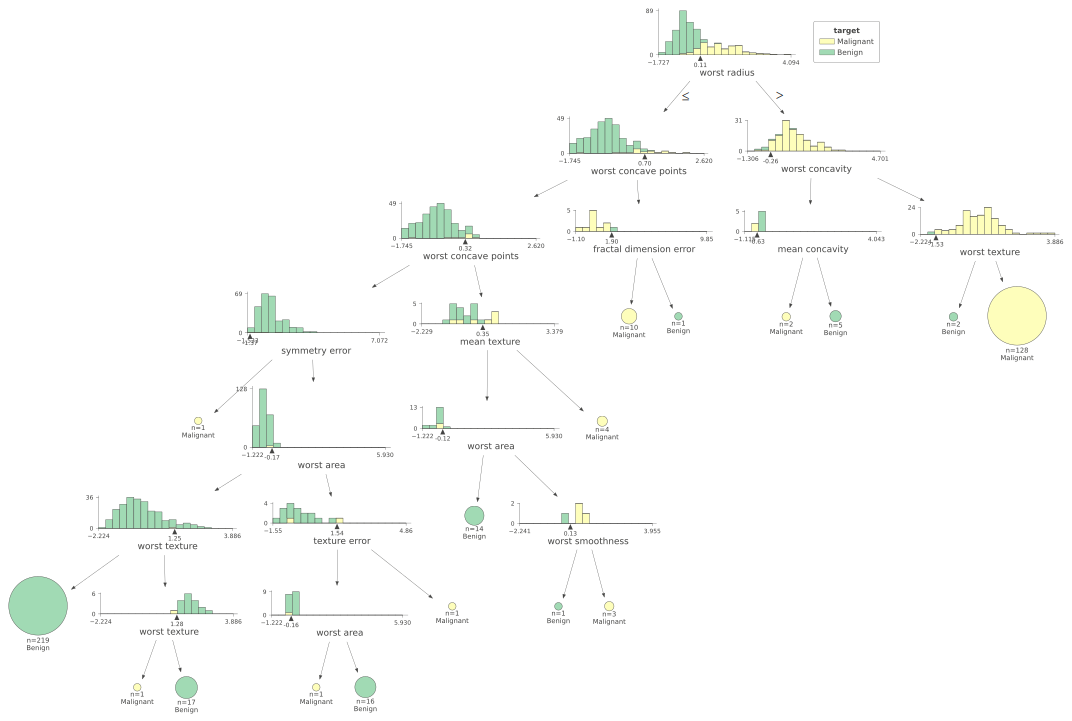

In [22]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model, 
  x_train,
  y_train,
  target_name='target',
  feature_names=data['feature_names'],
  class_names=['Malignant', 'Benign'])

viz

### Feature Importance

의사결정나무가 학습할 때 중요하게 생각한 특징들을 중요도 순으로 나열할 수 있습니다.

In [23]:
features = pd.DataFrame(
    model.feature_importances_,
    index=data['feature_names'],
    columns=['importance']
).sort_values('importance', ascending=False)

features

,importance
worst radius,0.732075
worst concave points,0.101098
worst concavity,0.033285
worst texture,0.030418
worst area,0.029569
mean texture,0.023316
mean concavity,0.014656
symmetry error,0.009980
fractal dimension error,0.009326
texture error,0.008583


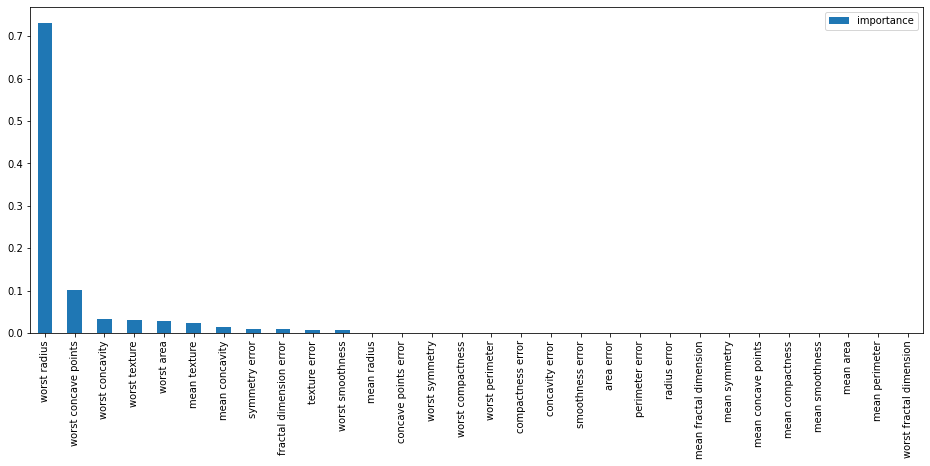

In [24]:
features.plot.bar(figsize=(16, 6))
plt.show()